In [29]:
pip install seaborn

In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [57]:
df = pd.read_csv("Data/hotel_bookings.csv") 
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,9/6/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,9/7/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,9/7/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,9/7/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,9/7/2017


In [58]:
df.shape

(119390, 32)

In [59]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [60]:
def data_clean(df):
    df.fillna(0,inplace = True) 
    print(df.isnull().sum())
    

In [61]:
data_clean(df)

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

In [62]:
list_cols = ["children", "adults", "babies"]
for i in list_cols:
    print(f"{i} has unique values as {df[i].unique()}")

children has unique values as [ 0.  1.  2. 10.  3.]
adults has unique values as [ 2  1  3  4 40 26 50 27 55  0 20  6  5 10]
babies has unique values as [ 0  1  2 10  9]


In [63]:
filtered_data = (df['children'] == 0) & (df['adults'] == 0) & (df['babies'] == 0) 
final_data = df[~filtered_data]

In [64]:
final_data.shape

(119210, 32)

In [65]:
country_wise_data =  final_data[final_data['is_canceled'] == 0]['country'].value_counts().reset_index()
country_wise_data.columns = ["Country", "No.of guests"]
print(country_wise_data)

    Country  No.of guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     BHR             1
162     DJI             1
163     MLI             1
164     NPL             1
165     FRO             1

[166 rows x 2 columns]


In [66]:
pip install plotly

In [67]:
import plotly.express as px
from array import array

In [68]:
map_guests = px.choropleth(country_wise_data, locations = country_wise_data['Country'],
                           color = country_wise_data["No.of guests"],
                           hover_name = country_wise_data['Country'],
                           title = "Home country of guests"
                          )

map_guests.show()

In [69]:
final_data["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [70]:
array(['Resort Hotel', 'City Hotel'], dtype=object)
final_data

TypeError: array.array() takes no keyword arguments

In [ ]:
data = final_data[final_data["is_canceled"] == 0]

In [ ]:
plt.figure(figsize = (12,8)) #default

sns.boxplot(x = "reserved_room_type",
           y = "adr", 
           hue = "hotel", data = data)

plt.title("Price of room types per night per person", fontsize = 16)
plt.xlabel("Room type")
plt.ylabel("Price [EUR]")
plt.legend(loc = "upper right")
plt.ylim(0,600)
plt.show()


In [ ]:
final_data["hotel"].unique()

In [ ]:
array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
data_resort = final_data[(final_data["hotel"] == "Resort Hotel") & (final_data["is_canceled"] == 0)]


data_city = final_data[(final_data["hotel"] == "City Hotel") & (final_data["is_canceled"] == 0)]

In [ ]:
resort_hotel = data_resort.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [ ]:
city_hotel = data_city.groupby(['arrival_date_month'])['adr'].mean().reset_index()


In [ ]:
final = resort_hotel.merge(city_hotel, on = "arrival_date_month")

final.columns = ["month", "price_for_resort_hotel", "price_for_city_hotel"]

In [ ]:
print(final)

In [71]:
from calendar import month_name

def sort_month(df, colname):
    month_dict = { j:i for i, j in enumerate(month_name) } #dictionary comprehension
    df["month_num"] = df[colname].apply(lambda x: month_dict[x])
    return df.sort_values(by = "month_num").reset_index().drop(['index', 'month_num'], axis = 1)

In [72]:
sort_month(final, "month")

NameError: name 'final' is not defined

In [73]:
final.plot(kind = "line", x = "month", y = ['price_for_resort_hotel','price_for_city_hotel'])

NameError: name 'final' is not defined

In [74]:
data_resort.head()

NameError: name 'data_resort' is not defined

In [75]:
rush_resort = data_resort["arrival_date_month"].value_counts().reset_index()
rush_resort.columns = ["month", "no of guests"]
print(rush_resort)

NameError: name 'data_resort' is not defined

In [76]:
rush_city = data_city["arrival_date_month"].value_counts().reset_index()
rush_city.columns = ["month", "no of guests"]
print(rush_city)

NameError: name 'data_city' is not defined

In [77]:
final_rush = rush_resort.merge(rush_city, on = "month")
final_rush.columns = ["month", "no of guests in resort hotel", "no of guests in city hotel"]
final_rush

NameError: name 'rush_resort' is not defined

In [78]:
final_rush = sort_month(final_rush, "month")
print(final_rush)

NameError: name 'final_rush' is not defined

In [79]:
final_rush.plot(kind = "line", x = "month", 
                y = ["no of guests in resort hotel","no of guests in city hotel" ])


NameError: name 'final_rush' is not defined

In [80]:
filter_condition = final_data['is_canceled'] == 0
clean_data = final_data[filter_condition]
clean_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [81]:
clean_data["total_nights"] = clean_data["stays_in_weekend_nights"] + clean_data["stays_in_week_nights"]
clean_data.head()

C:\Users\gayua\AppData\Local\Temp\ipykernel_4776\4232077337.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0.0,0,Transient,0.0,0,0,Check-Out,7/1/2015,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,304.0,0.0,0,Transient,75.0,0,0,Check-Out,7/2/2015,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,240.0,0.0,0,Transient,98.0,0,1,Check-Out,7/3/2015,2


In [82]:
stay = clean_data.groupby(["total_nights", "hotel"]).agg('count').reset_index()
stay = stay.iloc[:, 0:3]
print(stay)

    total_nights         hotel  is_canceled
0              0    City Hotel          251
1              0  Resort Hotel          371
2              1    City Hotel         9155
3              1  Resort Hotel         6579
4              2    City Hotel        10983
..           ...           ...          ...
57            46  Resort Hotel            1
58            48    City Hotel            1
59            56  Resort Hotel            1
60            60  Resort Hotel            1
61            69  Resort Hotel            1

[62 rows x 3 columns]


In [83]:
stay = stay.rename(columns = {'is_canceled': 'Number of stays'})
print(stay)

    total_nights         hotel  Number of stays
0              0    City Hotel              251
1              0  Resort Hotel              371
2              1    City Hotel             9155
3              1  Resort Hotel             6579
4              2    City Hotel            10983
..           ...           ...              ...
57            46  Resort Hotel                1
58            48    City Hotel                1
59            56  Resort Hotel                1
60            60  Resort Hotel                1
61            69  Resort Hotel                1

[62 rows x 3 columns]


<Axes: xlabel='total_nights', ylabel='Number of stays'>

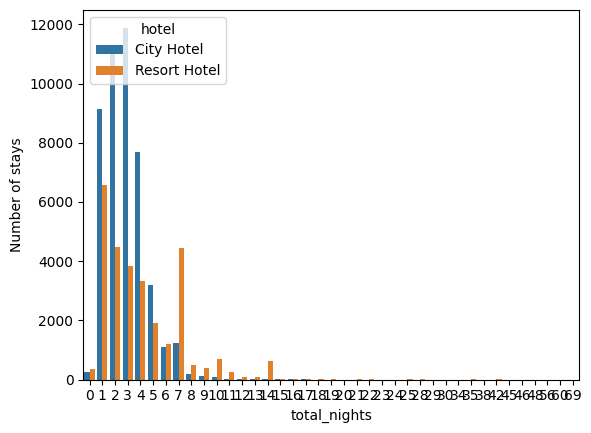

In [84]:
sns.barplot(x = "total_nights", y = "Number of stays", hue = "hotel",
           hue_order = ["City Hotel", "Resort Hotel"], data = stay)


In [85]:
final_data.shape

(119210, 32)

In [86]:
final_data['is_canceled']==0

0         True
1         True
2         True
3         True
4         True
          ... 
119385    True
119386    True
119387    True
119388    True
119389    True
Name: is_canceled, Length: 119210, dtype: bool

In [87]:
final_data[final_data['is_canceled']==0]['country']

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 75011, dtype: object

In [88]:
final_data[final_data['is_canceled']==0]['country'].value_counts().reset_index()

,country,count
0,PRT,20977
1,GBR,9668
2,FRA,8468
3,ESP,6383
4,DEU,6067
...,...,...
161,BHR,1
162,DJI,1
163,MLI,1
164,NPL,1


In [89]:
country_wise_data=final_data[final_data['is_canceled']==0]['country'].value_counts().reset_index()
print(country_wise_data)

    country  count
0       PRT  20977
1       GBR   9668
2       FRA   8468
3       ESP   6383
4       DEU   6067
..      ...    ...
161     BHR      1
162     DJI      1
163     MLI      1
164     NPL      1
165     FRO      1

[166 rows x 2 columns]


In [90]:
country_wise_data.columns=['country','No.of.guests']
print(country_wise_data)

    country  No.of.guests
0       PRT         20977
1       GBR          9668
2       FRA          8468
3       ESP          6383
4       DEU          6067
..      ...           ...
161     BHR             1
162     DJI             1
163     MLI             1
164     NPL             1
165     FRO             1

[166 rows x 2 columns]


In [91]:
import plotly.express as ex

In [92]:
map_guests=px.choropleth(country_wise_data,locations=country_wise_data['country'],
                         color=country_wise_data['No.of.guests'],
                         hover_name=country_wise_data['country'],
                         title="home country of our guests",
                        )
map_guests.show()

In [93]:
final_data["reservation_status"].value_counts()

reservation_status
Check-Out    75011
Canceled     42993
No-Show       1206
Name: count, dtype: int64

In [94]:
final_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [95]:
cat_not = ["country", "reservation_status", "booking_changes", "assigned_room_type", "days_in_waiting_list" ]

In [96]:
cat_features = [col for col in final_data.columns 
                if final_data[col].dtype == "O" and col not in cat_not]

In [97]:
print(cat_features)

['hotel', 'arrival_date_month', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type', 'reservation_status_date']


In [98]:
data_cat = final_data[cat_features]
print(data_cat.head())

          hotel arrival_date_month meal market_segment distribution_channel   
0  Resort Hotel               July   BB         Direct               Direct  \
1  Resort Hotel               July   BB         Direct               Direct   
2  Resort Hotel               July   BB         Direct               Direct   
3  Resort Hotel               July   BB      Corporate            Corporate   
4  Resort Hotel               July   BB      Online TA                TA/TO   

  reserved_room_type deposit_type customer_type reservation_status_date  
0                  C   No Deposit     Transient                7/1/2015  
1                  C   No Deposit     Transient                7/1/2015  
2                  A   No Deposit     Transient                7/2/2015  
3                  A   No Deposit     Transient                7/2/2015  
4                  A   No Deposit     Transient                7/3/2015  


In [99]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

data_cat["reservation_status_date"] = pd.to_datetime(data_cat["reservation_status_date"])


In [100]:
data_cat["year"] = data_cat["reservation_status_date"].dt.year

data_cat["month"] = data_cat["reservation_status_date"].dt.month

data_cat["day"] = data_cat["reservation_status_date"].dt.day

data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03,2015,7,3


In [101]:
data_cat.drop("reservation_status_date", axis = 1, inplace = True)
data_cat.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [102]:
data_cat.columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'deposit_type',
       'customer_type', 'year', 'month', 'day'],
      dtype='object')

In [103]:
data_cat["cancellation"] = final_data["is_canceled"]
print(data_cat)

               hotel arrival_date_month meal market_segment   
0       Resort Hotel               July   BB         Direct  \
1       Resort Hotel               July   BB         Direct   
2       Resort Hotel               July   BB         Direct   
3       Resort Hotel               July   BB      Corporate   
4       Resort Hotel               July   BB      Online TA   
...              ...                ...  ...            ...   
119385    City Hotel             August   BB  Offline TA/TO   
119386    City Hotel             August   BB      Online TA   
119387    City Hotel             August   BB      Online TA   
119388    City Hotel             August   BB      Online TA   
119389    City Hotel             August   HB      Online TA   

       distribution_channel reserved_room_type deposit_type customer_type   
0                    Direct                  C   No Deposit     Transient  \
1                    Direct                  C   No Deposit     Transient   
2           

In [104]:
def mean_encode(df, col, mean_col):
    df_dict = df.groupby([col])[mean_col].mean().to_dict()
    df[col] = df[col].map(df_dict)
    return df

for col in data_cat.columns[0:8]:
    data_cat = mean_encode(data_cat, col, "cancellation")


In [105]:
data_cat.drop(["cancellation"], axis = 1, inplace = True)
print(data_cat)

           hotel  arrival_date_month      meal  market_segment   
0       0.277674            0.374644  0.374106        0.153712  \
1       0.277674            0.374644  0.374106        0.153712   
2       0.277674            0.374644  0.374106        0.153712   
3       0.277674            0.374644  0.374106        0.187618   
4       0.277674            0.374644  0.374106        0.367590   
...          ...                 ...       ...             ...   
119385  0.417859            0.377823  0.374106        0.343313   
119386  0.417859            0.377823  0.374106        0.367590   
119387  0.417859            0.377823  0.374106        0.367590   
119388  0.417859            0.377823  0.374106        0.367590   
119389  0.417859            0.377823  0.344653        0.367590   

        distribution_channel  reserved_room_type  deposit_type  customer_type   
0                   0.174868            0.330827       0.28402       0.407864  \
1                   0.174868            0.330

In [106]:
cat_data = data_cat 
dataframe = pd.concat([cat_data], axis = 1) 
print(dataframe.head())

      hotel  arrival_date_month      meal  market_segment   
0  0.277674            0.374644  0.374106        0.153712  \
1  0.277674            0.374644  0.374106        0.153712   
2  0.277674            0.374644  0.374106        0.153712   
3  0.277674            0.374644  0.374106        0.187618   
4  0.277674            0.374644  0.374106        0.367590   

   distribution_channel  reserved_room_type  deposit_type  customer_type   
0              0.174868            0.330827       0.28402       0.407864  \
1              0.174868            0.330827       0.28402       0.407864   
2              0.174868            0.391567       0.28402       0.407864   
3              0.220568            0.391567       0.28402       0.407864   
4              0.410598            0.391567       0.28402       0.407864   

   year  month  day  
0  2015      7    1  
1  2015      7    1  
2  2015      7    2  
3  2015      7    2  
4  2015      7    3  


In [107]:
dataframe.describe()["arrival_date_month"]

count    119210.000000
mean          0.370766
std           0.033756
min           0.305016
25%           0.334451
50%           0.377823
75%           0.397029
max           0.414860
Name: arrival_date_month, dtype: float64

<Axes: xlabel='arrival_date_month', ylabel='Density'>

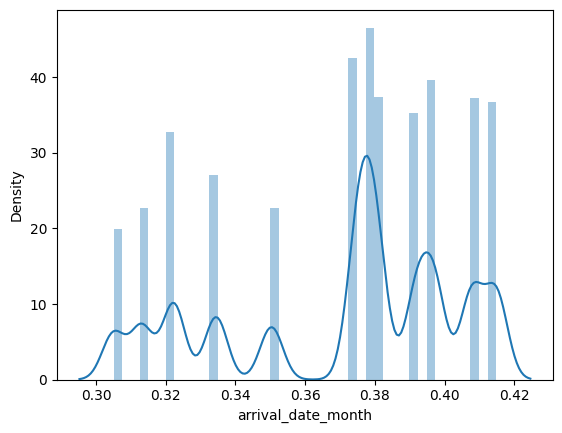

In [108]:
sns.distplot(dataframe["arrival_date_month"])

In [109]:
def handle_outlier(col):
    dataframe[col] = np.log1p(dataframe[col])

In [110]:
handle_outlier("arrival_date_month")

<Axes: xlabel='arrival_date_month', ylabel='Density'>

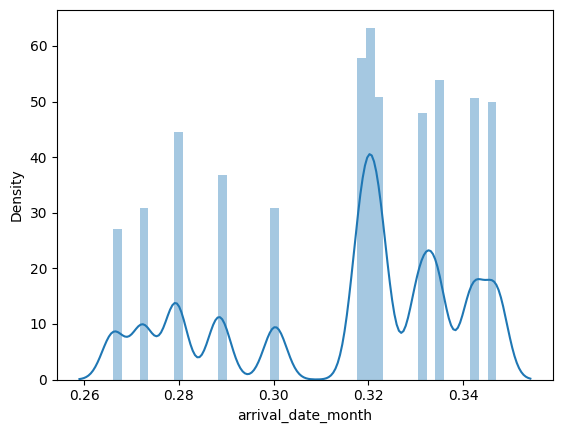

In [111]:
sns.distplot(dataframe["arrival_date_month"].dropna())

<Axes: xlabel='arrival_date_month', ylabel='Density'>

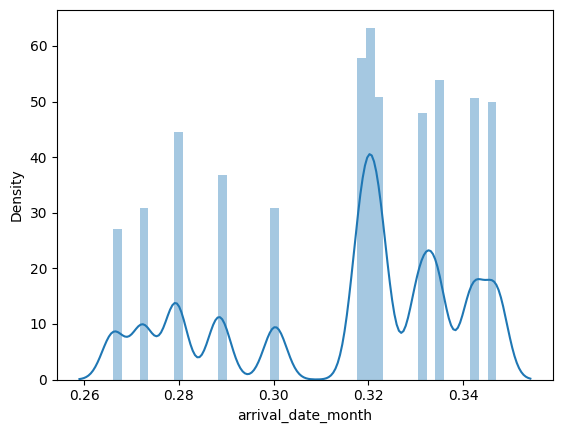

In [112]:
sns.distplot(dataframe["arrival_date_month"])

In [113]:
handle_outlier("arrival_date_month")

In [114]:
dataframe.isnull().sum()

hotel                   0
arrival_date_month      0
meal                    0
market_segment          0
distribution_channel    0
reserved_room_type      0
deposit_type            0
customer_type           0
year                    0
month                   0
day                     0
dtype: int64

In [115]:
import pandas as pd

In [116]:
df = pd.DataFrame()
print(df)


Empty DataFrame
Columns: []
Index: []


In [117]:
Dataframe.dropna(inplace = True)

NameError: name 'Dataframe' is not defined

In [ ]:
y = dataframe["is_canceled"] #dependent variable

X = dataframe.drop("is_canceled", axis = 1) #independent


In [118]:
X.columns

NameError: name 'X' is not defined

In [119]:
X.columns

NameError: name 'X' is not defined

In [120]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [121]:
y = dataframe["is_canceled"] 

X = dataframe.drop("is_canceled", axis = 1) 

KeyError: 'is_canceled'

In [ ]:
models = []
models.append(("Naive Bayes", GaussianNB()))
models.append(("Random Forest", RandomForestClassifier()))
models.append(("Decision Tree", DecisionTreeClassifier()))
models.append(("KNN", KNeighborsClassifier(n_neighbors = 5)))

In [122]:
for name, model in models:
    print(name)
    model.fit(x_train, y_train)
    
    #make a predictions
    predictions = model.predict(x_test)
    
    #evaluate a model
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))
    
    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions, y_test))
    
    print("\n")

NameError: name 'models' is not defined